<a href="https://colab.research.google.com/github/TomJenkin/playground/blob/main/markets_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
*   Want to predict for all history and see if can make money for large move predictions.
*   Words could be Normal, BigUp, BigDown !!
*   Could put in grid U and D, say based upon STDs. E.g. U3D5 means price up 3 stds and volumne down 5 stds

In [1]:
from tabulate import tabulate
from IPython.display import display, HTML

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

In [46]:
pd.set_option('display.max_rows', 100)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-07 00:00:00-04:00,6746.140137,6754.490234,6699.959961,6714.589844,5546150000,0.0,0.0
2025-10-08 00:00:00-04:00,6723.870117,6755.640137,6718.089844,6753.720215,5383130000,0.0,0.0
2025-10-09 00:00:00-04:00,6760.500000,6764.580078,6716.169922,6735.109863,5385020000,0.0,0.0
2025-10-10 00:00:00-04:00,6740.490234,6762.399902,6550.779785,6552.509766,5385020000,0.0,0.0
2025-10-13 00:00:00-04:00,6622.529785,6668.680176,6620.709961,6661.299805,1678572000,0.0,0.0


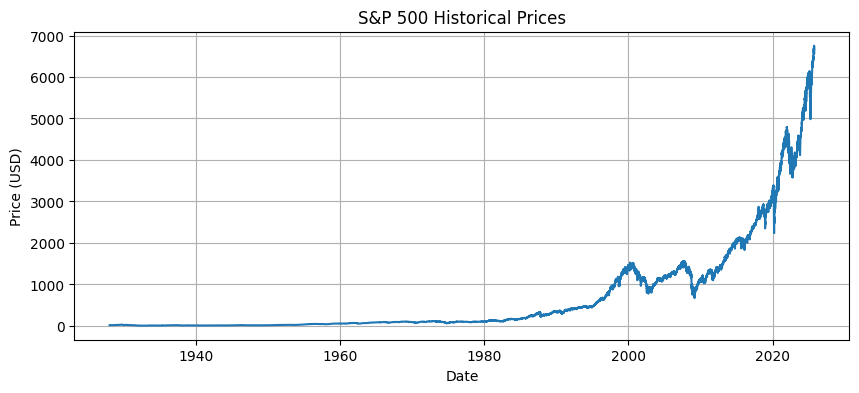

In [3]:
# 2. Create a ticker for the S&P 500 index (^GSPC)
sp500 = yf.Ticker("^GSPC")

# 3. Pull full historical data
data = sp500.history(period="max")  # you can also use start/end dates
display(data.tail())

# 4. Plot closing prices
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Close'])
plt.title("S&P 500 Historical Prices")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# 5. Optional: save to CSV
data.to_csv("sp500_history.csv")


In [4]:
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

+---------------------------+--------+--------+-------+---------+----------+-------------+----------------+
| Date                      |   Open |   High |   Low |   Close |   Volume |   Dividends |   Stock Splits |
|---------------------------+--------+--------+-------+---------+----------+-------------+----------------|
| 1927-12-30 00:00:00-05:00 |  17.66 |  17.66 | 17.66 |   17.66 |        0 |           0 |              0 |
| 1928-01-03 00:00:00-05:00 |  17.76 |  17.76 | 17.76 |   17.76 |        0 |           0 |              0 |
| 1928-01-04 00:00:00-05:00 |  17.72 |  17.72 | 17.72 |   17.72 |        0 |           0 |              0 |
| 1928-01-05 00:00:00-05:00 |  17.55 |  17.55 | 17.55 |   17.55 |        0 |           0 |              0 |
| 1928-01-06 00:00:00-05:00 |  17.66 |  17.66 | 17.66 |   17.66 |        0 |           0 |              0 |
+---------------------------+--------+--------+-------+---------+----------+-------------+----------------+


In [11]:
df = data.Close.pct_change().dropna()
df.head()

,Close
Date,
1928-01-03 00:00:00-05:00,0.005663
1928-01-04 00:00:00-05:00,-0.002252
1928-01-05 00:00:00-05:00,-0.009594
1928-01-06 00:00:00-05:00,0.006268
1928-01-09 00:00:00-05:00,-0.009060


In [73]:
ds = data.Close.pct_change().rename(0)
dr = ds.to_frame()
for n in range(1,5):
    dr[-n] = dr[0].shift(n)
dr = dr.sort_index(axis=1).dropna()
model = cluster.KMeans(n_clusters=30).fit(dr)
dr = dr.assign(label = model.labels_)
dm = dr.label.value_counts().reset_index().rename_axis('label2').reset_index()
dmr = dm.set_index('label').label2.to_dict()
dr = dr.assign(label2 = dr.label.map(dmr))
dr.tail()

,-4,-3,-2,-1,0,label,label2
Date,,,,,,,
2025-10-07 00:00:00-04:00,0.003400,0.000618,0.000066,0.003647,-0.003811,6,1
2025-10-08 00:00:00-04:00,0.000618,0.000066,0.003647,-0.003811,0.005828,9,4
2025-10-09 00:00:00-04:00,0.000066,0.003647,-0.003811,0.005828,-0.002756,18,3
2025-10-10 00:00:00-04:00,0.003647,-0.003811,0.005828,-0.002756,-0.027112,4,7
2025-10-13 00:00:00-04:00,-0.003811,0.005828,-0.002756,-0.027112,0.016603,1,19
